# Normalized Score and Color Calculator
-----
    Use this to calculate a normalized score and color assignments for ZCTA-based demographic data.

In [45]:
import pandas as pd
from matplotlib.cm import winter
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt

In [46]:
# Open your CSVs as a dataframes
    
with open('../all_econ_data.csv', newline='\n', encoding='utf-8-sig') as a:
    all_econ_data = pd.read_csv(a)
    
with open('../zcta_map/resources/zip_data.csv', newline='\n', encoding='utf-8-sig') as b:
    zip_data = pd.read_csv(b)
    
with open('../hcprovider_data/doctor_geo.csv', newline='\n', encoding='utf-8-sig') as c:
    doctor_geo = pd.read_csv(c)
    
with open('../hcprovider_data/hospital_geo.csv', newline='\n', encoding='utf-8-sig') as d:
    hospital_geo = pd.read_csv(d)

In [47]:
all_econ_data.head()

,Zip Code,Total Population,Labor Force Participation Rate,Unemployment Rate,Per Capita Income,"Total households - Less than $10,000","Total households - \$10,000-$14,999","Total households - \$15,000-$24,999","Total households - \$25,000-$34,999","Total households - \$35,000-$49,999",...,"Total households - \$75,000-$99,999","Total households - \$100,000-$149,999","Total households - \$150,000-$199,999","Total households - \$200,000 or more",Total Households,Median Income by Household,Total Families,Median Income by Families,Total Nonfamily Households,Median Income by Nonfamily Households
0,20001,41692,73,5,54353.0,1730,885,1302,876,1072,...,1710,3765,2191,3475,18764,100447,6040,113317,12724,93786
1,20002,52867,72,6,49452.0,2501,1163,1559,1504,2142,...,2894,4720,2729,3704,26217,82022,10665,101998,15552,69683
2,20003,26330,71,5,63600.0,686,367,456,352,417,...,1496,2566,1840,2852,12394,118607,5296,167746,7098,94339
3,20004,1610,88,4,117432.0,48,8,9,20,63,...,102,329,166,339,1163,144583,280,248672,883,135189
4,20005,12311,84,2,76658.0,751,212,304,425,446,...,1292,1602,839,1318,8172,94506,1668,142821,6504,83333


In [48]:
zip_data.head()

,zip,city,county,median_household_income,population,feature,area,density,nml_dens,nml_inc,color_key
0,20001,"Washington, DC",District Of Columbia,100447.0,41692,"{'type': 'Feature', 'geometry': {'type': 'Poly...",5.835524,7144.516970,0.759751,0.386274,#0062ce
1,20002,"Washington, DC",District Of Columbia,82022.0,52867,"{'type': 'Feature', 'geometry': {'type': 'Poly...",14.228399,3715.597280,0.964587,0.284281,#0048db
2,20003,"Washington, DC",District Of Columbia,118607.0,26330,"{'type': 'Feature', 'geometry': {'type': 'Poly...",6.447784,4083.573672,0.478169,0.486800,#007cc1
3,20004,"Washington, DC",District Of Columbia,144583.0,1610,"{'type': 'Feature', 'geometry': {'type': 'Mult...",0.904905,1779.192084,0.025057,0.630593,#00a1ae
4,20005,"Washington, DC",District Of Columbia,94506.0,12311,"{'type': 'Feature', 'geometry': {'type': 'Poly...",1.122787,10964.678013,0.221204,0.353387,#005ad2


In [49]:
doctor_geo.head()

,Unnamed: 0,lat,lng,name,vicinity,placeid,zip
0,0,38.917568,-77.020726,Howard University Hospital:pulmonary,"2041 Georgia Avenue Northwest, Washington",ChIJf2TW1OS3t4kRmYwM_D3YU9g,20001
1,1,38.905311,-77.012765,"Shiban Raina, MD","128 M Street Northwest #050, Washington",ChIJqVHvjcHHt4kR9bkSKfeYk6M,20001
2,2,38.905363,-77.018377,Aziz Salim MD,"2175 K Street Northwest, Washington",ChIJO7BERbS3t4kRdCq1JjRVF9c,20001
3,3,38.910311,-77.021587,Abramson Randi C MD,"1525 7th Street Northwest, Washington",ChIJNcEa_fG3t4kROr29e7EFZJw,20001
4,4,38.910311,-77.021587,"Hope Ferdowsian, MD, MPH","1525 7th Street Northwest, Washington",ChIJxfO-cZTJt4kR1eicxoihlSc,20001


In [50]:
dr_grpby = doctor_geo[['placeid','zip']].groupby('zip')

dr_df = pd.DataFrame(dr_grpby.count())

dr_df.head()

,placeid
zip,
20001,32
20002,58
20003,49
20004,14
20005,20


In [51]:
hos_grpby = hospital_geo[['placeid','zip']].groupby('zip')

hos_df = pd.DataFrame(dr_grpby.count())

hos_df.head()

,placeid
zip,
20001,32
20002,58
20003,49
20004,14
20005,20


In [52]:
all_econ_data = all_econ_data.rename(index=str, columns={'Zip Code': 'zip'})

all_econ_data = all_econ_data.set_index('zip')

all_econ_data.head()

,Total Population,Labor Force Participation Rate,Unemployment Rate,Per Capita Income,"Total households - Less than $10,000","Total households - \$10,000-$14,999","Total households - \$15,000-$24,999","Total households - \$25,000-$34,999","Total households - \$35,000-$49,999","Total households - \$50,000-$74,999","Total households - \$75,000-$99,999","Total households - \$100,000-$149,999","Total households - \$150,000-$199,999","Total households - \$200,000 or more",Total Households,Median Income by Household,Total Families,Median Income by Families,Total Nonfamily Households,Median Income by Nonfamily Households
zip,,,,,,,,,,,,,,,,,,,,
20001,41692,73,5,54353.0,1730,885,1302,876,1072,1758,1710,3765,2191,3475,18764,100447,6040,113317,12724,93786
20002,52867,72,6,49452.0,2501,1163,1559,1504,2142,3301,2894,4720,2729,3704,26217,82022,10665,101998,15552,69683
20003,26330,71,5,63600.0,686,367,456,352,417,1362,1496,2566,1840,2852,12394,118607,5296,167746,7098,94339
20004,1610,88,4,117432.0,48,8,9,20,63,79,102,329,166,339,1163,144583,280,248672,883,135189
20005,12311,84,2,76658.0,751,212,304,425,446,983,1292,1602,839,1318,8172,94506,1668,142821,6504,83333


In [53]:
econ_select = all_econ_data[['Total Population', 'Unemployment Rate', 'Per Capita Income']]

econ_select.head()

,Total Population,Unemployment Rate,Per Capita Income
zip,,,
20001,41692,5,54353.0
20002,52867,6,49452.0
20003,26330,5,63600.0
20004,1610,4,117432.0
20005,12311,2,76658.0


In [63]:
econ_select2 = econ_select.merge(hos_df, on='zip', how='inner')
econ_select2 = econ_select2.rename(index=str, columns={'placeid': 'hospital facilities'})
econ_select2 = pd.DataFrame(econ_select2)

econ_select2

,Total Population,Unemployment Rate,Per Capita Income,hospital facilities
zip,,,,
20001,41692,5,54353.0,32
20002,52867,6,49452.0,58
20003,26330,5,63600.0,49
20004,1610,4,117432.0,14
20005,12311,2,76658.0,20
20006,2780,9,15033.0,20
20007,23866,4,83915.0,59
20008,26034,2,97465.0,52
20009,46797,4,74204.0,69


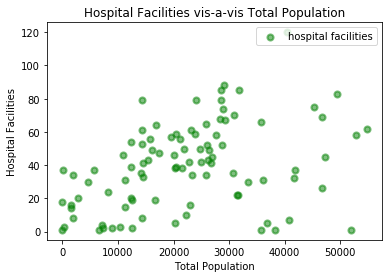

In [77]:
plt.scatter(econ_select2["Total Population"], econ_select2["hospital facilities"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Hospital Facilities vis-a-vis Total Population")
plt.xlabel("Total Population")
plt.ylabel("Hospital Facilities")


# Create a legend.
plt.legend(loc= "upper right")

# plt.savefig("../Images/Total Population_versus_Hospital Facilities.png")
# Correlation : The more populated areas does not translate into increased hospital facilities.
#Show plot.
plt.show()

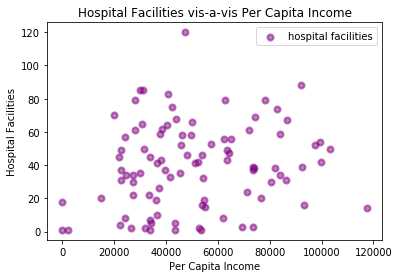

In [81]:
plt.scatter(econ_select2["Per Capita Income"], econ_select2["hospital facilities"], color = "purple", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Hospital Facilities vis-a-vis Per Capita Income")
plt.xlabel("Per Capita Income")
plt.ylabel("Hospital Facilities")


# Create a legend.
plt.legend(loc= "upper right")

# plt.savefig("../Images/Per Capita Income_versus_Hospital Facilities.png")

#Show plot.
plt.show()

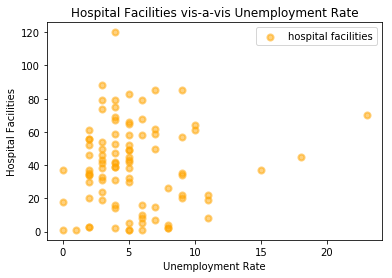

In [79]:
# Scatter Plot for Correlation between Unemployment Rate and Hospital Facilities
plt.scatter(econ_select2["Unemployment Rate"], econ_select2["hospital facilities"], color = "orange", marker = "o", alpha = 0.5, linewidth = 2.1)

plt.title("Hospital Facilities vis-a-vis Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Hospital Facilities")

# Create a legend.
plt.legend(loc= "upper right")
# Correlation: There is a greater presence of hospitals in the areas with less employment rates.
plt.show()

In [83]:
econ_select3 = econ_select.merge(dr_df, on='zip', how='inner')
econ_select3 = econ_select3.rename(index=str, columns={'placeid': 'doctors'})
econ_select3 = pd.DataFrame(econ_select3)

econ_select3.head()

,Total Population,Unemployment Rate,Per Capita Income,doctors
zip,,,,
20001,41692,5,54353.0,32
20002,52867,6,49452.0,58
20003,26330,5,63600.0,49
20004,1610,4,117432.0,14
20005,12311,2,76658.0,20


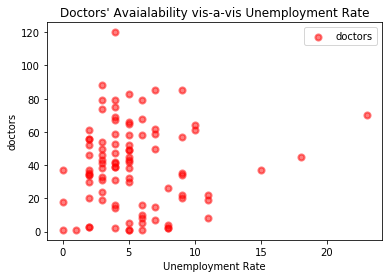

In [84]:
# Scatter Plot for Correlation between Per Capita Income and Doctors
plt.scatter(econ_select3["Unemployment Rate"], econ_select3["doctors"], color = "red", marker = "o", alpha = 0.5, linewidth = 2.1)

plt.title("Doctors' Avaialability vis-a-vis Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("doctors")

# Create a legend.
plt.legend(loc= "upper right")

# Correlation: There is a greater presence of doctors in the areas with less employment rates.
plt.show()

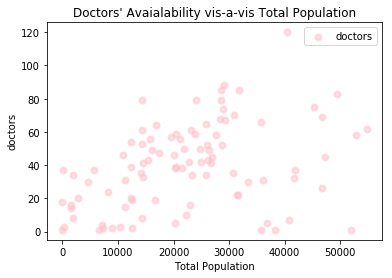

In [85]:
# Scatter Plot for Correlation between Total Population and Doctors
plt.scatter(econ_select3["Total Population"], econ_select3["doctors"], color = "pink", marker = "o", alpha = 0.5, linewidth = 2.1)

plt.title("Doctors' Avaialability vis-a-vis Total Population")
plt.xlabel("Total Population")
plt.ylabel("doctors")

# Create a legend.
plt.legend(loc= "upper right")

# Correlation : The more populated areas does not translate into greater availability of doctors.
plt.show()

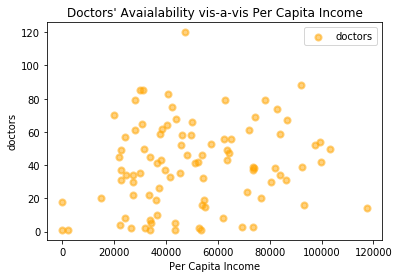

In [86]:
# Scatter Plot for Correlation between Per Capita Income and Doctors
plt.scatter(econ_select3["Per Capita Income"], econ_select3["doctors"], color = "orange", marker = "o", alpha = 0.5, linewidth = 2.1)

plt.title("Doctors' Avaialability vis-a-vis Per Capita Income")
plt.xlabel("Per Capita Income")
plt.ylabel("doctors")

# Create a legend.
plt.legend(loc= "upper right")

plt.show()

In [74]:
econ_select4 = econ_select3
econ_select4['hospital facilities'] = econ_select2['hospital facilities']

econ_select4 = econ_select4.fillna(0)

econ_select4.head()

,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities
zip,,,,,
20001,41692,5,54353.0,32,32
20002,52867,6,49452.0,58,58
20003,26330,5,63600.0,49,49
20004,1610,4,117432.0,14,14
20005,12311,2,76658.0,20,20


In [ ]:
# Scatter Plot for Correlation between Per Capita Income and Doctors
plt.scatter(econ_select3["Per Capita Income"], econ_select3["doctors"], color = "orange", marker = "o", alpha = 0.5, linewidth = 2.1)

plt.title("Doctors' Avaialability vis-a-vis Per Capita Income")
plt.xlabel("Per Capita Income")
plt.ylabel("doctors")

# Create a legend.
plt.legend(loc= "upper right")

plt.show()

In [38]:
min_emp = min(econ_select4['Unemployment Rate'])
max_emp = max(econ_select4['Unemployment Rate'])
emp_range = max_emp - min_emp

econ_select4['nml_emp'] = (1 - (econ_select4['Unemployment Rate'] - min_emp)/emp_range)

econ_select4

,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities,nml_emp
zip,,,,,,
20001,41692,5,54353.0,32,32,0.782609
20002,52867,6,49452.0,58,58,0.739130
20003,26330,5,63600.0,49,49,0.782609
20004,1610,4,117432.0,14,14,0.826087
20005,12311,2,76658.0,20,20,0.913043
20006,2780,9,15033.0,20,20,0.608696
20007,23866,4,83915.0,59,59,0.826087
20008,26034,2,97465.0,52,52,0.913043
20009,46797,4,74204.0,69,69,0.826087


In [39]:
min_inc = min(econ_select4['Per Capita Income'])
max_inc = max(econ_select4['Per Capita Income'])
inc_range = max_inc - min_inc

econ_select4['nml_inc'] = ((econ_select4['Per Capita Income'] - min_emp)/inc_range)

econ_select4.head()

,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities,nml_emp,nml_inc
zip,,,,,,,
20001,41692,5,54353.0,32,32,0.782609,0.462847
20002,52867,6,49452.0,58,58,0.739130,0.421112
20003,26330,5,63600.0,49,49,0.782609,0.541590
20004,1610,4,117432.0,14,14,0.826087,1.000000
20005,12311,2,76658.0,20,20,0.913043,0.652786


In [40]:
def calculate_color(pop):
    mpl_color = winter(pop)
    gmaps_color = to_hex(mpl_color, keep_alpha=False)
    return gmaps_color

colors = []

for pop in econ_select4['nml_inc'].tolist():
    try:
        color = calculate_color(pop)
    except KeyError:
        color = (0, 0, 0, 0.3)
        print('key error')
    colors.append(color)

In [41]:
econ_select4['color_key_inc'] = colors

econ_select4.head()

,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities,nml_emp,nml_inc,color_key_inc
zip,,,,,,,,
20001,41692,5,54353.0,32,32,0.782609,0.462847,#0076c4
20002,52867,6,49452.0,58,58,0.739130,0.421112,#006bca
20003,26330,5,63600.0,49,49,0.782609,0.541590,#008aba
20004,1610,4,117432.0,14,14,0.826087,1.000000,#00ff80
20005,12311,2,76658.0,20,20,0.913043,0.652786,#00a7ac


In [42]:
def calculate_color(pop):
    mpl_color = winter(pop)
    gmaps_color = to_hex(mpl_color, keep_alpha=False)
    return gmaps_color

colors = []

for pop in econ_select4['nml_emp'].tolist():
    try:
        color = calculate_color(pop)
    except KeyError:
        color = (0, 0, 0, 0.3)
        print('key error')
    colors.append(color)

In [43]:
econ_select4['color_key_emp'] = colors

econ_select4.head()

,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities,nml_emp,nml_inc,color_key_inc,color_key_emp
zip,,,,,,,,,
20001,41692,5,54353.0,32,32,0.782609,0.462847,#0076c4,#00c89b
20002,52867,6,49452.0,58,58,0.739130,0.421112,#006bca,#00bda0
20003,26330,5,63600.0,49,49,0.782609,0.541590,#008aba,#00c89b
20004,1610,4,117432.0,14,14,0.826087,1.000000,#00ff80,#00d396
20005,12311,2,76658.0,20,20,0.913043,0.652786,#00a7ac,#00e98b


In [23]:
econ_select4.to_csv('../primary_data.csv', encoding='utf-8')